#                                Mnist-Handwritten Dataset - ANN & CNN

**M916 - Machine Learning**

**Coursework 3**

In [ ]:
#--------------------------------------- Mnist-Handwritten Dataset - Implementation -------------------------------------------

# Import necessary libraries
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from __future__ import absolute_import, division, print_function
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers import BatchNormalization

Information about the particular dataset

num_classes = 10    # total classes (0-9 digits)

num_features = 784  # data features (image shape: 28*28)

The digits are size-normalized and centered in a fixed-size image

The dataset is pre-split in train and test sets

Train set: 60000 images, size: 28*28 pixel, Test set: 10000 images, size: 28*28 pixel

Need to reshape the data arrays to have a single color channel

10 classes are represented as unique integers in the range between black and white (grayscale), or 0 and 255 

Need to normalize the pixel values of grayscale images, rescale them to the range [0,1]

Use one-hot encoding for the class element of each sample, 
1 value for the index of the class value and 0 value for all the other classes

In [ ]:
#------------------------------------------------- MNIST dataset Preparation ---------------------------------------------------

def load_prepare_dataset():
    
    # Load the dataset
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data() # the dataset is pre-split in train and test set

    # Reshape/flatten the images
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

    # Use One-hot encoding to set exactly one of the positions in the vector to 1 (the correct digit) and the rest digits to 0
    num_classes = 10 
    Y_train = to_categorical(Y_train,num_classes)
    Y_test = to_categorical(Y_test,num_classes)
    #print("First 5 training lables as one-hot encoded vectors:\n", Y_train[:5])
    
    # Convert from integer to float32 
    X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

    # Normalize image values from [0, 255] to [0, 1] by dividing the pixel values with the maximum value
    X_train, X_test = (X_train / 255) , (X_test / 255)

    # Summarize the loaded dataset
    print('Number of images in Train sets: X = %s, Y = %s' % (X_train.shape, Y_train.shape)) 
    print('Number of images in Test sets: X = %s, Y =%s' % (X_test.shape, Y_test.shape))
    
    return X_train,Y_train,X_test,Y_test

# Call the function to load and prepare the dataset
X_train, Y_train, X_test, Y_test = load_prepare_dataset()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Plot the images

num = 10
num_row = 2
num_col = 5
images = X_train[:num]

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
#---------------------------------------------------- Create Plots -------------------------------------------------------------

# A function that plots the loss and accuracy

def show_train_history(train_history, train, validation):
    plt.plot( train_history.history[ train ])
    plt.plot( train_history.history[ validation ])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

In [ ]:
#------------------------------------------------ Evaluate the results --------------------------------------------------------

# A function that computes the accuracy and the confusion matrix of a model and prints the classification report

def evaluate_results(model):
    # Evaluare the model's performance using the accuracy
    accuracy = model.evaluate(X_test, Y_test, verbose = 1) 
    print('Model evaluation:', accuracy)
    print()
    
    # Verbose = 1 shows an animated progress bar
    predictions = model.predict(X_test)
    Y_pred = (predictions > 0.5)
    matrix = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

    print(matrix)
    print()
    print('Classification report of Confusion matrix:\n', classification_report(Y_test,Y_pred))

# Artificial Neural Network

In [ ]:
#-------------------------------------- Create and compile the ANN model ------------------------------------------------------

image_size = 784
# 2 fully-connected dense layers with 256 and 128 neurons. Use ReLu activation function.
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(28,28))) 
ann_model.add(Dense(256, activation='relu', input_shape=(image_size,))) 
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dropout(0.3)) # Regularization method that probabilistically removes inputs during training
ann_model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons and softmax activation function

# The label is encoded with one hot and then the loss of the model uses cross entropy
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model's summary 
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#------------------------------------------------- Train the ANN model ---------------------------------------------------------

train_history = ann_model.fit(X_train, Y_train, epochs = 15, batch_size = 32, validation_split = 0.1, verbose = 1)

# validation_split: the model is evaluated on the validation dataset at the end of each training epoch
# verbose: show you an animated progress bar 

Epoch 1/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9222 - val_loss: 0.0946 - val_accuracy: 0.9725
Epoch 2/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1091 - accuracy: 0.9668 - val_loss: 0.0812 - val_accuracy: 0.9772
Epoch 3/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0766 - accuracy: 0.9764 - val_loss: 0.0829 - val_accuracy: 0.9767
Epoch 4/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0585 - accuracy: 0.9814 - val_loss: 0.0760 - val_accuracy: 0.9790
Epoch 5/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 0.0787 - val_accuracy: 0.9790
Epoch 6/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.0846 - val_accuracy: 0.9800
Epoch 7/15
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0801 - val_accuracy:

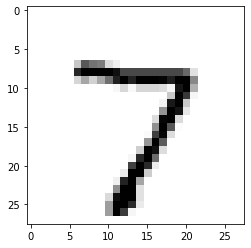

Model prediction: 7


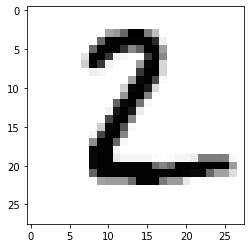

Model prediction: 2


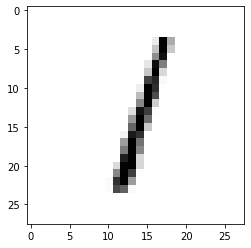

Model prediction: 1


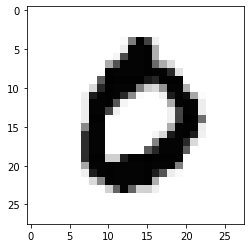

Model prediction: 0


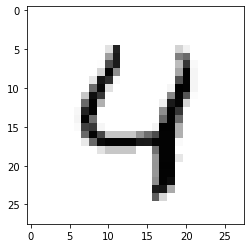

Model prediction: 4


In [ ]:
# Predict 5 images from validation set
n_images = 5
test_images = X_test[:n_images]
predictions = ann_model(test_images)

# Display image and model prediction
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='Greys')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

# Convolutional Neural Network

In [ ]:
#----------------------------------------- Create and compile the CNN model ----------------------------------------------------

cnn_model = Sequential()
cnn_model.add(Conv2D(64, kernel_size = (3, 3), input_shape=(28,28,1))) # Convolutional layer with 64 kernels
cnn_model.add(Conv2D(32, kernel_size = (3, 3))) # Convolutional layer with 32 kernels
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten()) 
cnn_model.add(Dense(128, activation='relu')) # Fully connected layer with 128 neurons
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons and softmax activation function

# The label is encoded with one hot and then the loss of the model uses cross entropy
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model's summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
#---------------------------------------------- Train the CNN model ---------------------------------------------------------------

train_history1 = cnn_model.fit(X_train, Y_train, epochs = 15, batch_size = 32, validation_split = 0.1, verbose = 1)

Epoch 1/15
1688/1688 [==============================] - 50s 30ms/step - loss: 0.1999 - accuracy: 0.9396 - val_loss: 0.0574 - val_accuracy: 0.9847
Epoch 2/15
1688/1688 [==============================] - 49s 29ms/step - loss: 0.0856 - accuracy: 0.9732 - val_loss: 0.0583 - val_accuracy: 0.9845
Epoch 3/15
1688/1688 [==============================] - 49s 29ms/step - loss: 0.0625 - accuracy: 0.9799 - val_loss: 0.0584 - val_accuracy: 0.9833
Epoch 4/15
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.0553 - val_accuracy: 0.9870
Epoch 5/15
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0457 - accuracy: 0.9851 - val_loss: 0.0583 - val_accuracy: 0.9873
Epoch 6/15
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0428 - accuracy: 0.9854 - val_loss: 0.0591 - val_accuracy: 0.9885
Epoch 7/15
1688/1688 [==============================] - 49s 29ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0601 -

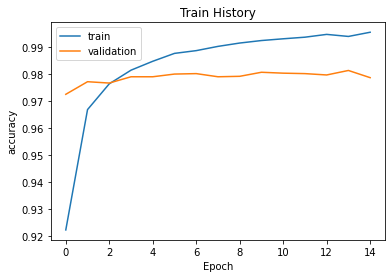

In [ ]:
#----------------------------------------------------- Create the Plots --------------------------------------------------------

# Performance Learning Curve of accuracy for the ANN Model
show_train_history( train_history, 'accuracy', 'val_accuracy')

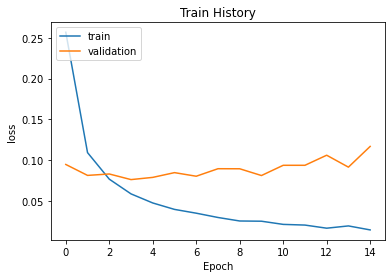

In [ ]:
# Optimization Learning Curve of loss for the ANN Model
show_train_history( train_history, 'loss', 'val_loss')

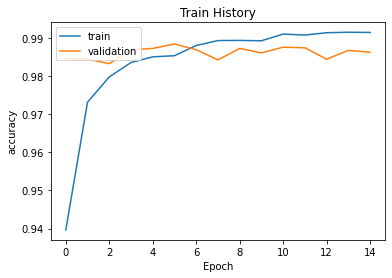

In [ ]:
# Performance Learning Curve of accuracy for the CNN Model
show_train_history(train_history1, 'accuracy', 'val_accuracy')

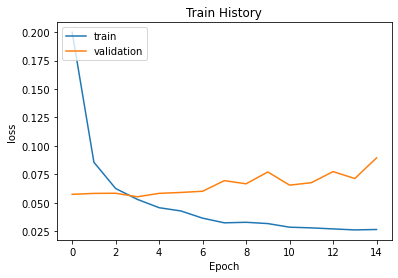

In [ ]:
# Optimization Learning Curve of loss for the CNN Model
show_train_history(train_history1, 'loss', 'val_loss')

In [ ]:
#-------------------------------------------------- Evaluate the results -------------------------------------------------------

# Use the function to evaluate the results of the ANN Model
evaluate_results(ann_model)

313/313 [==============================] - 0s 758us/step - loss: 0.1126 - accuracy: 0.9783
Model evaluation: [0.11260351538658142, 0.9782999753952026]

[[ 972    0    3    0    0    1    2    0    1    1]
 [   0 1128    1    3    0    0    1    0    2    0]
 [   3    1 1000   14    1    0    1    7    4    1]
 [   1    0    0  999    0    4    0    3    2    1]
 [   3    1    2    2  958    0    6    1    2    7]
 [   2    0    0   10    1  871    1    1    5    1]
 [   5    2    0    1    4    7  939    0    0    0]
 [   4    4    5   10    3    0    0  998    1    3]
 [   4    1    2    8    4    0    1    2  950    2]
 [   7    3    0   14   14    4    0    4    3  960]]

Classification report of Confusion matrix:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.94      0.99      0.96      1010
 

C:\Users\chris\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Use the function to evaluate the results of the CNN Model
evaluate_results(cnn_model)

313/313 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9845
Model evaluation: [0.08168814331293106, 0.984499990940094]

[[ 969    0    2    0    0    1    5    2    1    0]
 [   1 1127    2    1    0    1    2    1    0    0]
 [   2    1 1017    3    0    0    2    7    0    0]
 [   0    0    2 1004    0    3    0    0    1    0]
 [   0    0    0    0  973    0    5    0    0    4]
 [   1    0    1    7    0  880    2    0    1    0]
 [   5    2    0    0    2    6  942    0    1    0]
 [   0    2    6    1    1    0    0 1016    1    1]
 [   2    2    3    8    2    3    1    3  949    1]
 [   4    2    0    5   12    6    0    6    5  969]]

Classification report of Confusion matrix:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
    

C:\Users\chris\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


There is a small difference among the trained models on the test set. It is evident that the Convolutional Neural Network performed slightly better than the Artificial Neural Network, since it achieved higher accuracy and less loss. This can be mainly due to the fact that the architecture of the ANN was simpler than the architecture of the CNN, even though I added to both a flattening layer and a dropout, and used the same number of epochs (15) and batch size (32) during training, so that I can compare them. However, I noticed that the CNN needed higher computational time in relation to the NN because deeper and more complex networks require more training time. The combination of deeper networks with more nodes per hidden layer as well as the increased training epochs resulted in taking the training process longer to run. Perhaps I should increase the batch size to check whether the training process accelerates. To sum up, the Convolutional Neural Networks seemed to have learned more features than the Artificial Neural Network, but it does not mean that the performance of the ANN model did not provide satisfactory results. Nevertheless, perhaps the use of regularization methods would help reduce overfitting of the models.

# Bonus - CNN

In [ ]:
#---------------------------------------------------- BONUS --------------------------------------------------------------------

# Use max pooling after each convolutional layer

cnn2_model = Sequential()
cnn2_model.add(Conv2D(64, kernel_size = (3, 3), input_shape=(28,28,1))) # Convolutional layer with 64 kernels
cnn2_model.add(MaxPooling2D((2, 2)))
cnn2_model.add(Conv2D(32, kernel_size = (3, 3))) # Convolutional layer with 32 kernels
cnn2_model.add(MaxPooling2D((2, 2)))
cnn2_model.add(Flatten()) 
cnn2_model.add(Dense(128, activation='relu')) # Fully connected layer with 128 neurons
cnn2_model.add(Dropout(0.3))
cnn2_model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons and softmax activation function

# The label is encoded with one hot and then the loss of the model uses cross entropy
cnn2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model's summary
cnn2_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
#---------------------------------------------- Train the CNN model (BONUS) ---------------------------------------------------------------

callbacks = EarlyStopping(monitor = 'val_loss', patience = 2 , verbose = 1, restore_best_weights = True, mode = 'auto')
# patience: Number of epochs with no improvement after which training will be stopped
# restore_best_weights: use best model's weight or the last epoch weight
# verbose = 1: show you an animated progress bar 

# Train neural network
train_history2 = cnn2_model.fit(X_train, Y_train, epochs = 15, batch_size = 32, validation_split = 0.1, verbose = 1, callbacks=[callbacks])

Epoch 1/15
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1923 - accuracy: 0.9410 - val_loss: 0.0676 - val_accuracy: 0.9800
Epoch 2/15
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0714 - accuracy: 0.9777 - val_loss: 0.0460 - val_accuracy: 0.9867
Epoch 3/15
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 4/15
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0434 - accuracy: 0.9864 - val_loss: 0.0522 - val_accuracy: 0.9880
Epoch 5/15
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0397 - val_accuracy: 0.9897
Epoch 6/15
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0386 - val_accuracy: 0.9893
Epoch 7/15
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0310 -

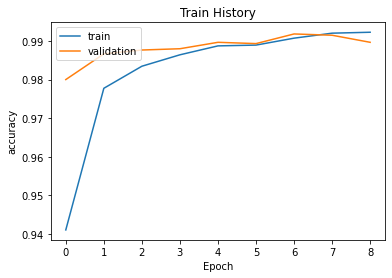

In [ ]:
show_train_history(train_history2, 'accuracy', 'val_accuracy')

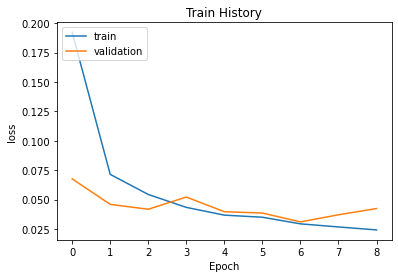

In [ ]:
show_train_history(train_history2, 'loss', 'val_loss')

In [ ]:
evaluate_results(cnn2_model)

313/313 [==============================] - 1s 4ms/step - loss: 0.0365 - accuracy: 0.9901
Model evaluation: [0.0365302674472332, 0.9901000261306763]

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    0 1027    0    1    0    0    3    0    0]
 [   1    0    2  998    0    7    0    1    1    0]
 [   1    1    2    0  972    0    3    0    0    3]
 [   3    0    1    6    0  880    2    0    0    0]
 [   6    3    3    0    1    2  942    0    1    0]
 [   2    2    5    0    0    0    0 1018    0    1]
 [   3    1    3    1    1    0    0    1  962    2]
 [   3    1    0    2    5    4    1    4    2  987]]

Classification report of Confusion matrix:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
    

C:\Users\chris\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I added maxpooling after every convolutional layer as well as an extra regularization method (early stopping) to avoid overfitting. It seems that the model achieved higher accuracy and less loss than the first CNN model. This is mainly due to the fact that the bonus CNN Model was less complex than the first as it had less hyperparameters. Although the curve of the validation loss increases in contrast to the curve of the training loss as a sign of overfitting, the two curves have higher convergence and there is smaller gap between them, whereas in the first CNN model their gap was bigger and their divergence significant. 

# EXPERIMENT: IMPROVE THE PERFORMANCE OF THE CNN MODEL

In [ ]:
# ----------------------------------------- Create and Compile a new CNN Model ------------------------------------------------

# Improve the performance of the model
# I created a new CNN model to apply early-stopping and avoid overfitting
# Epochs: 25
# Batch size: 128

cnn1_model = Sequential()
cnn1_model.add(Conv2D(64, kernel_size = (3, 3), input_shape=(28,28,1))) # Convolutional layer with 64 kernels
cnn1_model.add(BatchNormalization())
cnn1_model.add(MaxPooling2D((2, 2)))
cnn1_model.add(Conv2D(32, kernel_size = (3, 3))) # Convolutional layer with 32 kernels
cnn1_model.add(MaxPooling2D((2, 2)))
cnn1_model.add(BatchNormalization())
cnn1_model.add(Flatten())
cnn1_model.add(Dense(128, activation='relu')) # Fully connected layer with 128 neurons
cnn1_model.add(BatchNormalization())
cnn1_model.add(Dropout(0.3))
cnn1_model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons and softmax activation function

# The label is encoded with one hot and then the loss of the model uses cross entropy
cnn1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model's summary
cnn1_model.summary()

# I added batch normalization because it standardizes the output of a layer, stabilizes and accelerates the learning process

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 5, 5, 32)          128       
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [ ]:
#----------------------------------------- Early-Stopping to CNN Model --------------------------------------------------------

callbacks = EarlyStopping(monitor = 'val_loss', patience = 2 , verbose = 1, restore_best_weights = True, mode = 'auto')
# patience: Number of epochs with no improvement after which training will be stopped
# restore_best_weights: use best model's weight or the last epoch weight
# verbose = 1: show you an animated progress bar 

# Train neural network
history = cnn1_model.fit(X_train, Y_train, epochs = 25, batch_size = 128, validation_split = 0.1, verbose = 1, callbacks=[callbacks])

Epoch 1/25
422/422 [==============================] - 27s 62ms/step - loss: 0.1810 - accuracy: 0.9455 - val_loss: 2.3827 - val_accuracy: 0.3883
Epoch 2/25
422/422 [==============================] - 26s 62ms/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 0.0477 - val_accuracy: 0.9875
Epoch 3/25
422/422 [==============================] - 26s 62ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 4/25
422/422 [==============================] - 26s 62ms/step - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.0524 - val_accuracy: 0.9852
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


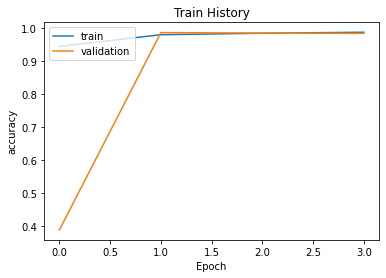

In [ ]:
show_train_history(history, 'accuracy', 'val_accuracy')

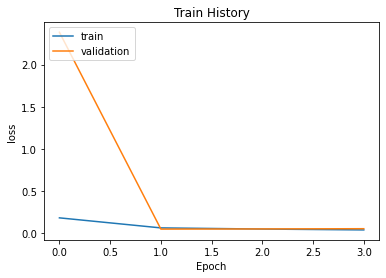

In [ ]:
show_train_history(history, 'loss', 'val_loss')

In [ ]:
evaluate_results(cnn1_model)

313/313 [==============================] - 2s 5ms/step - loss: 0.0464 - accuracy: 0.9855
Model evaluation: [0.04635494947433472, 0.9854999780654907]

[[ 978    0    0    0    0    0    1    1    0    0]
 [   2 1131    1    0    0    0    0    0    1    0]
 [   9    4 1008    0    1    0    3    6    1    0]
 [   1    0    2  995    0    4    0    3    3    2]
 [   2    1    0    0  974    0    0    1    0    4]
 [   8    2    1    4    0  872    3    1    1    0]
 [   5    4    0    0    1    1  945    0    2    0]
 [   2   10    6    1    0    0    0 1009    0    0]
 [  10    0    0    0    3    0    0    3  957    1]
 [  14    4    0    1    8    3    0    6    0  973]]

Classification report of Confusion matrix:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
   

C:\Users\chris\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I experimented with the parameters in order to improve the performance of the CNN model. I added batch normalization after each convolutional layer and after the dense layer, implemented early stopping with patience 2 and increased the batch size (from 32 to 128) as well as the number of epochs(from 15 to 25). I noticed that with the batch normalization, not only did the training process accelerate, but the accuracy improved and reduced the effect of overfitting. The convergence between the curves in the plots was dramatically improved. The model seems a good fit as the curve of the training loss was low and decreased even more to a point of stability. The curve of the validation loss was high but decreased dramatically and has a very small gap with the curve of the training loss. 

In [ ]:
cnn1_model.save('./my_cnn_model_mnist')

INFO:tensorflow:Assets written to: ./my_cnn_model_mnist\assets
